In [101]:
import pandas as pd
import missingno as msno
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier
from tensorflow.random import set_seed
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

set_seed(0)
np.random.seed(0)

In [59]:
raw_data = pd.read_csv('apple_quality.csv')

In [60]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [61]:
raw_data.drop(columns=['A_id'], inplace=True)

In [62]:
raw_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.491590483,good
1,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.722809367,good
2,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.621636473,bad
3,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.790723217,good
4,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.29,1.95,-0.20,-0.64,0.02,-1.09,1.854235285,good
3997,-2.63,-2.14,-2.44,0.66,2.20,4.76,-1.334611391,bad
3998,-4.01,-1.78,2.37,-0.20,2.16,0.21,-2.229719806,good
3999,0.28,-1.72,0.12,-1.15,1.27,-0.78,1.599796456,good


<AxesSubplot:>

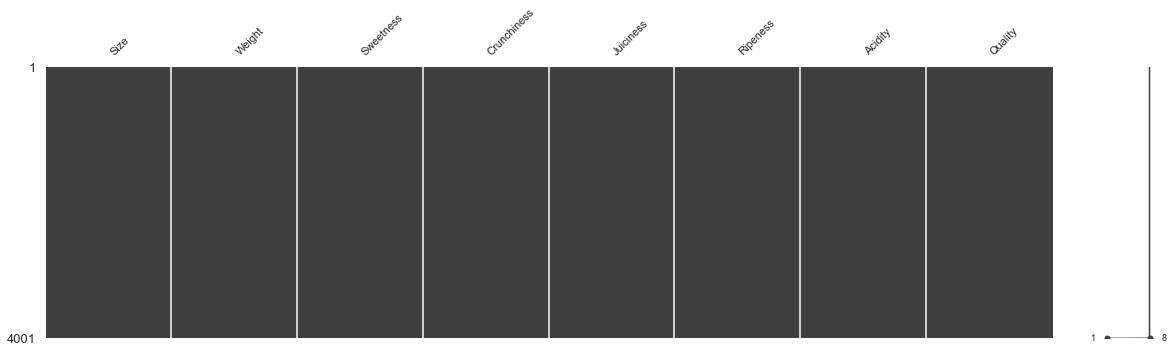

In [63]:
# Plot a matrix chart, set chart and font size
msno.matrix(raw_data, figsize=(20,5), fontsize=11)

In [64]:
raw_data.dropna(inplace=True)

In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [66]:
dfSummary(raw_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Size[float64],Mean (sd) : -0.5 (1.9)min < med < max:-7.2 < -0.5 < 6.4IQR (CV) : 2.6 (-0.3),"4,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFwAAAAUCAYAAAAA5FpZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA6UlEQVR4nO2YvQ3CMBCFHwgpjWmTgs4LwAJMQMUEaZkpnSdgKgpcu7FkKUzgXETiu/zc19qST8/W0ycf+r6HwsdJeoAcdV0/jTFNbj2E8PXevzlnmoPFBm6Madq2/eTWu657WGtXdyGLDZyiqqrz0IU45y6c84zlKD3A3tDAmdHAmRHpcMpAACCldAWQ7ei1IhI4ZSAA4Jy7Tzkjxniz1r6G9kiYzGothYKyGEDGZLTDmdHAmdHAmdHAmdHAmSliKZRnb9Wxx1AkcMqzpzr2XFCuXsLTN+vhY5D4cdQOZ+avF76Xji7xPfADQNJcMSFY28UAAAAASUVORK5CYII="">",0(0.0%)
2,Weight[float64],Mean (sd) : -1.0 (1.6)min < med < max:-7.1 < -1.0 < 5.8IQR (CV) : 2.0 (-0.6),"4,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFwAAAAUCAYAAAAA5FpZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA30lEQVR4nO2YsQ0CMQxFPwgpjWnvCrpbABZgCCZIy1qZgKkoSH1NpEjHBJEjdGdfgl/r5uvL+vr2YVkWGHKctAWUGIbhQURjaT7P8yfG+JLUtAa7NZyIRu/9uzQPIVwk9azFUVvAv7HbDedIKd2maXqW5nuNnGYNd86dW4wcixRhzHBhzHBhVDKc69gAkHO+AihmdKuoGM51bAAIIdyl9EhikSKMGS5Msz2cgzuMAJ3jqFvDucMI0DmOLFKE2WTDudrXa+WrYRPDK16rXVa+GrrN8Bo0Po4/Gd5LZGh8HL/7GFRry8gA4gAAAABJRU5ErkJggg=="">",0(0.0%)
3,Sweetness[float64],Mean (sd) : -0.5 (1.9)min < med < max:-6.9 < -0.5 < 6.4IQR (CV) : 2.5 (-0.2),"4,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFwAAAAUCAYAAAAA5FpZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA5ElEQVR4nO2YsQ3CMBBFPwgpjWmTgs4LwAIMwQRpWcsTMBUFrt1YihQmsM4y8Z0d7rXXnL6s76c7rOsKhY+T9AIpxnF8GGOm1DyE8PHevzh32oJmAzfGTPM8v1Nz59yFc5+tOEov8G80+8IpYow3a+0zNW+1croNfBiGc4+Vo5XCjAbOjEilUMoHAMuyXAEkK6NXRAKnlA8AnHN3rn040UphpltLoaC0EZBRx90GTmkjIKOOWinMaODMVKkUSvv2qnw5VAk849LXhPJJ3GN2+2nmIHGPKQpcK6OcosB7qYxfqeHyXwz+Y+VPd0gmAAAAAElFTkSuQmCC"">",0(0.0%)
4,Crunchiness[float64],Mean (sd) : 1.0 (1.4)min < med < max:-6.1 < 1.0 < 7.6IQR (CV) : 1.8 (0.7),"4,000 distinct values",,0(0.0%)
5,Juiciness[float64],Mean (sd) : 0.5 (1.9)min < med < max:-6.0 < 0.5 < 7.4IQR (CV) : 2.6 (0.3),"4,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFwAAAAUCAYAAAAA5FpZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA70lEQVR4nO2YvQ3CMBBGD4Tk5miTggZ5AViAIZjALWtlAqZgDxoKXLuxFCkU1P7B1p2TcK+9SP70SfG9ZDNNEwh87FoHCNF13RUR+9DcOXdExGdk/rbW3knCVTDbwhGxN8a8QvNhGC7GmEdkfqBJVse2dYB/QwpnRgpnRgpnpsnSTBkIAMA4jicACC7NpdKk8JSBAHwthCsPJ7PVwlq892et9S32TAtXX23hSql9xlvE7uqyNJmRwpmRwpmRwpkhWZopz16rY+dAUnjOnz6Kc38lpY4U2rhaLcwhpY4U2lhUuFwZ5RQVvpQroxaKr9UPT/Vcplic0V0AAAAASUVORK5CYII="">",0(0.0%)
6,Ripeness[float64],Mean (sd) : 0.5 (1.9)min < med < max:-5.9 < 0.5 < 7.2IQR (CV) : 2.5 (0.3),"4,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFwAAAAUCAYAAAAA5FpZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA60lEQVR4nO2YsQ3CMBBFPwgpjWmTgs4LwAJMQMUEaZkpnSdgKgpcu4lkyUzgXBTwXRzutU7x9S19PWeXUoLCx0E6QI62be/GmC53HkJ4e++fnJl+wWoLN8Z0fd+/cufDMNystdVdyGoLp2ia5jh1Ic65E2eeueylA/wbWjgzWjgzIhtOGQgAxBjPALIbXSsihVMGAgDOuStXHk50UpipVgspxnG8WGsfU99IuPpmC6c8HZBxdZ0UZrRwZrRwZopsOOXZW3XsORQpnPLstTg2ZTIlLGazljIHiT+OiwrXyVjOosJrmYxvKfF4+gB2V2CSMwsngQAAAABJRU5ErkJggg=="">",0(0.0%)
7,Acidity[object],1. -0.4915904832. 1.0068774543. -0.1324076034. 1.2230844415. 2.1906363536. 5.1251385037. -4.9049359088. -0.4242296459. -3.23996466110. -4.3600594711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)3,990 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGli

In [67]:
raw_data.Quality.replace('good', 1, inplace=True)
raw_data.Quality.replace('bad', 0, inplace=True)

In [68]:
bins = [-10, -7, -3, -1, 0, 1, 3, np.inf]
labels=['<-7','-7--3', '-3--1', '-1-0', '0-1', '1-3','>5']

apple_weight_df = raw_data.groupby(pd.cut(raw_data.Weight, bins=bins, labels=labels)).size().reset_index(name='Count')
apple_weight_df

,Weight,Count
0,<-7,1
1,-7--3,406
2,-3--1,1574
3,-1-0,989
4,0-1,630
5,1-3,365
6,>5,35


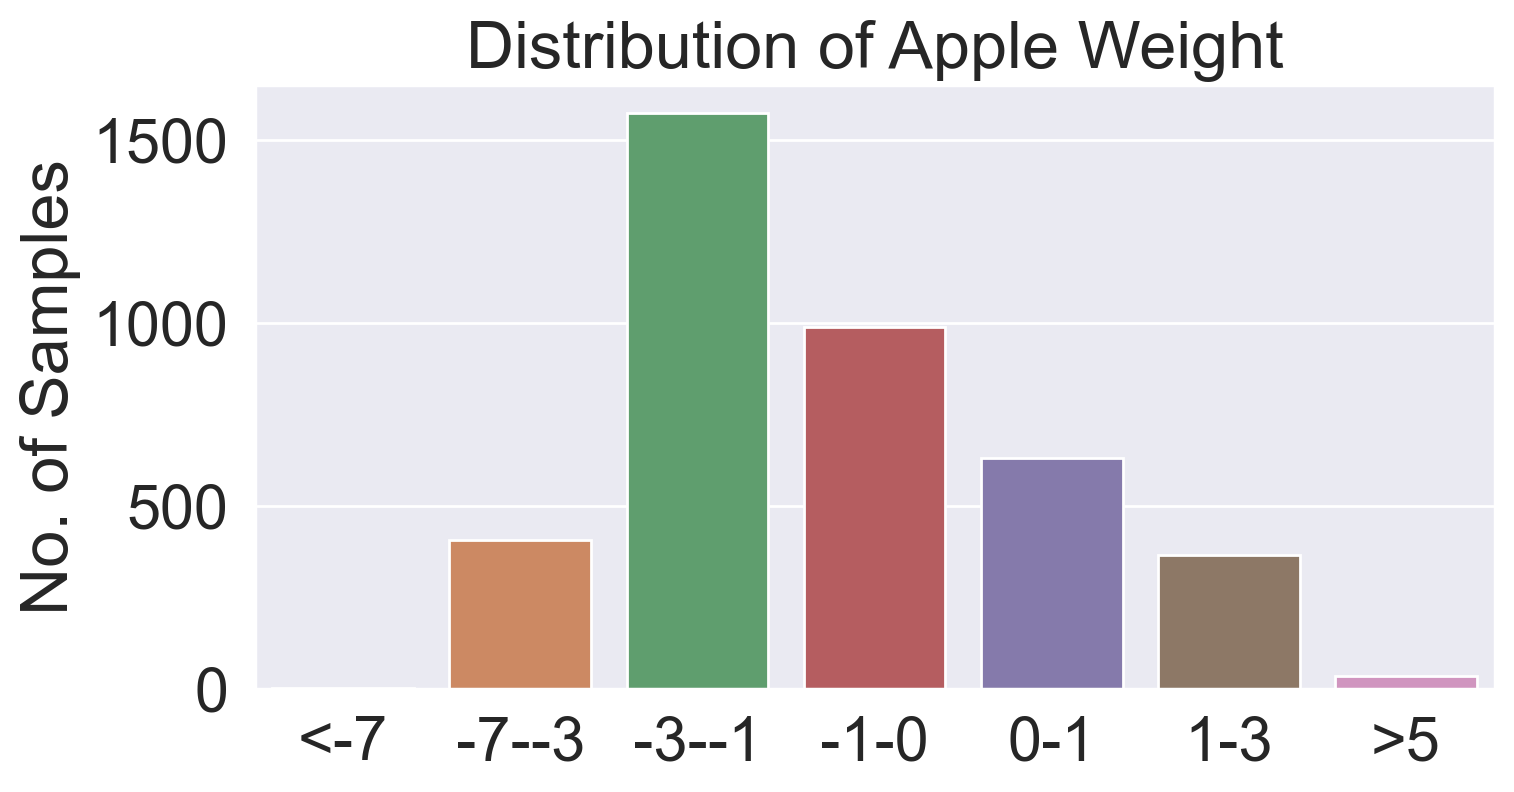

In [69]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=apple_weight_df,
             x=apple_weight_df.Weight.values,
             y=apple_weight_df.Count.values)
plt.ylabel('No. of Samples')
plt.title(f'Distribution of Apple Weight')
plt.show()

In [70]:
quality_rate = []
count_la = []
for segment in labels:
    if '<' in segment or '>' in segment:
        range_num = int(segment[1:])
        if '<' in segment:
            quality_rate.append(raw_data[(raw_data.Weight < range_num)][['Quality']].mean()[0]*100)
            count_la.append(raw_data[(raw_data.Weight < range_num)][['Quality']].count()[0])
        else:
            quality_rate.append(raw_data[(raw_data.Weight >= range_num)][['Quality']].mean()[0]*100)
            count_la.append(raw_data[(raw_data.Weight >= range_num)][['Quality']].count()[0])
    else:
        numbers = segment.split('-')
        if len(numbers) == 4:
            min_range = -1 * int(numbers[1])
            max_range = -1 * int(numbers[3])
        elif len(numbers) == 3:
            min_range = -1 * int(numbers[1])
            max_range = int(numbers[2])
        else:          
            min_range = int(numbers[0])
            max_range = int(numbers[1])
        quality_rate.append(raw_data[(raw_data.Weight>= min_range) & (raw_data.Weight < max_range)][['Quality']].mean()[0]*100)
        count_la.append(raw_data[(raw_data.Weight>= min_range) & (raw_data.Weight < max_range)][['Quality']].count()[0])

In [71]:
weight_quality_df = pd.DataFrame(data=list(zip(count_la, quality_rate)), index=labels)
weight_quality_df

,0,1
<-7,1,100.00
-7--3,406,70.20
-3--1,1574,45.36
-1-0,989,42.06
0-1,630,49.21
1-3,365,67.12
>5,3,100.00


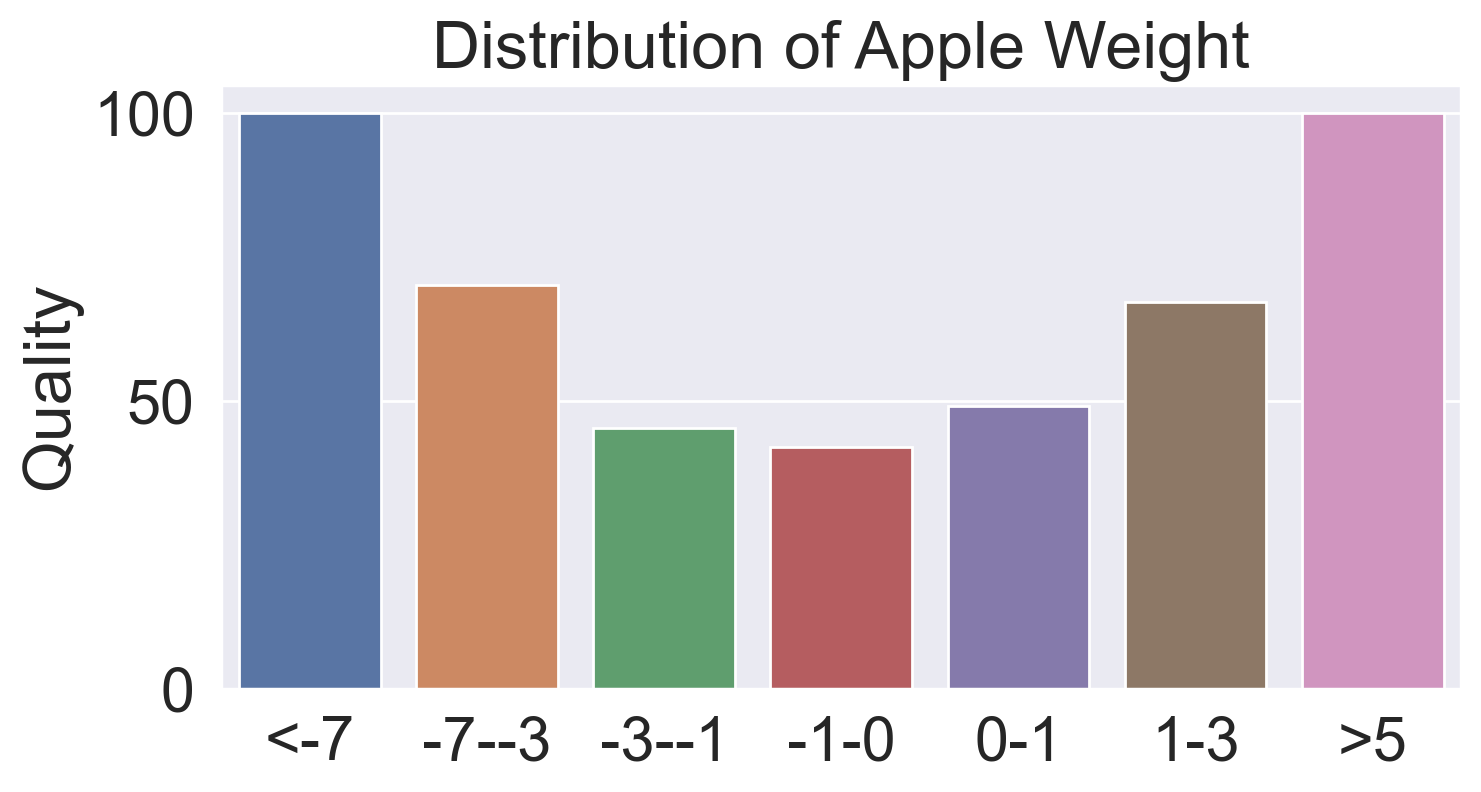

In [72]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(data=weight_quality_df,
             x=weight_quality_df.index,
             y=weight_quality_df[1])
plt.ylabel('Quality')
plt.title('Distribution of Apple Weight')
plt.show()

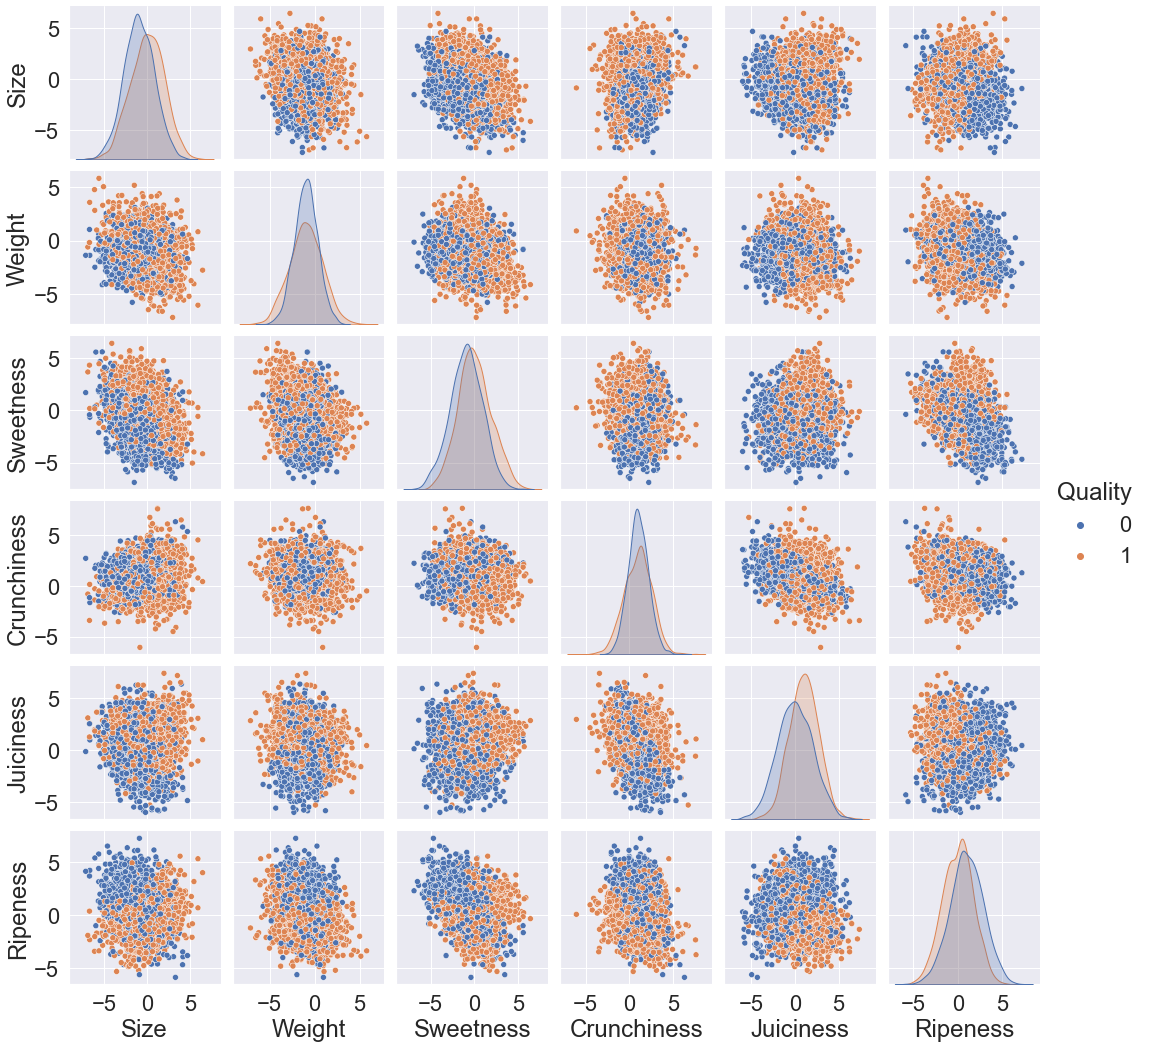

In [73]:
sns.pairplot(raw_data, hue ='Quality')
plt.show()

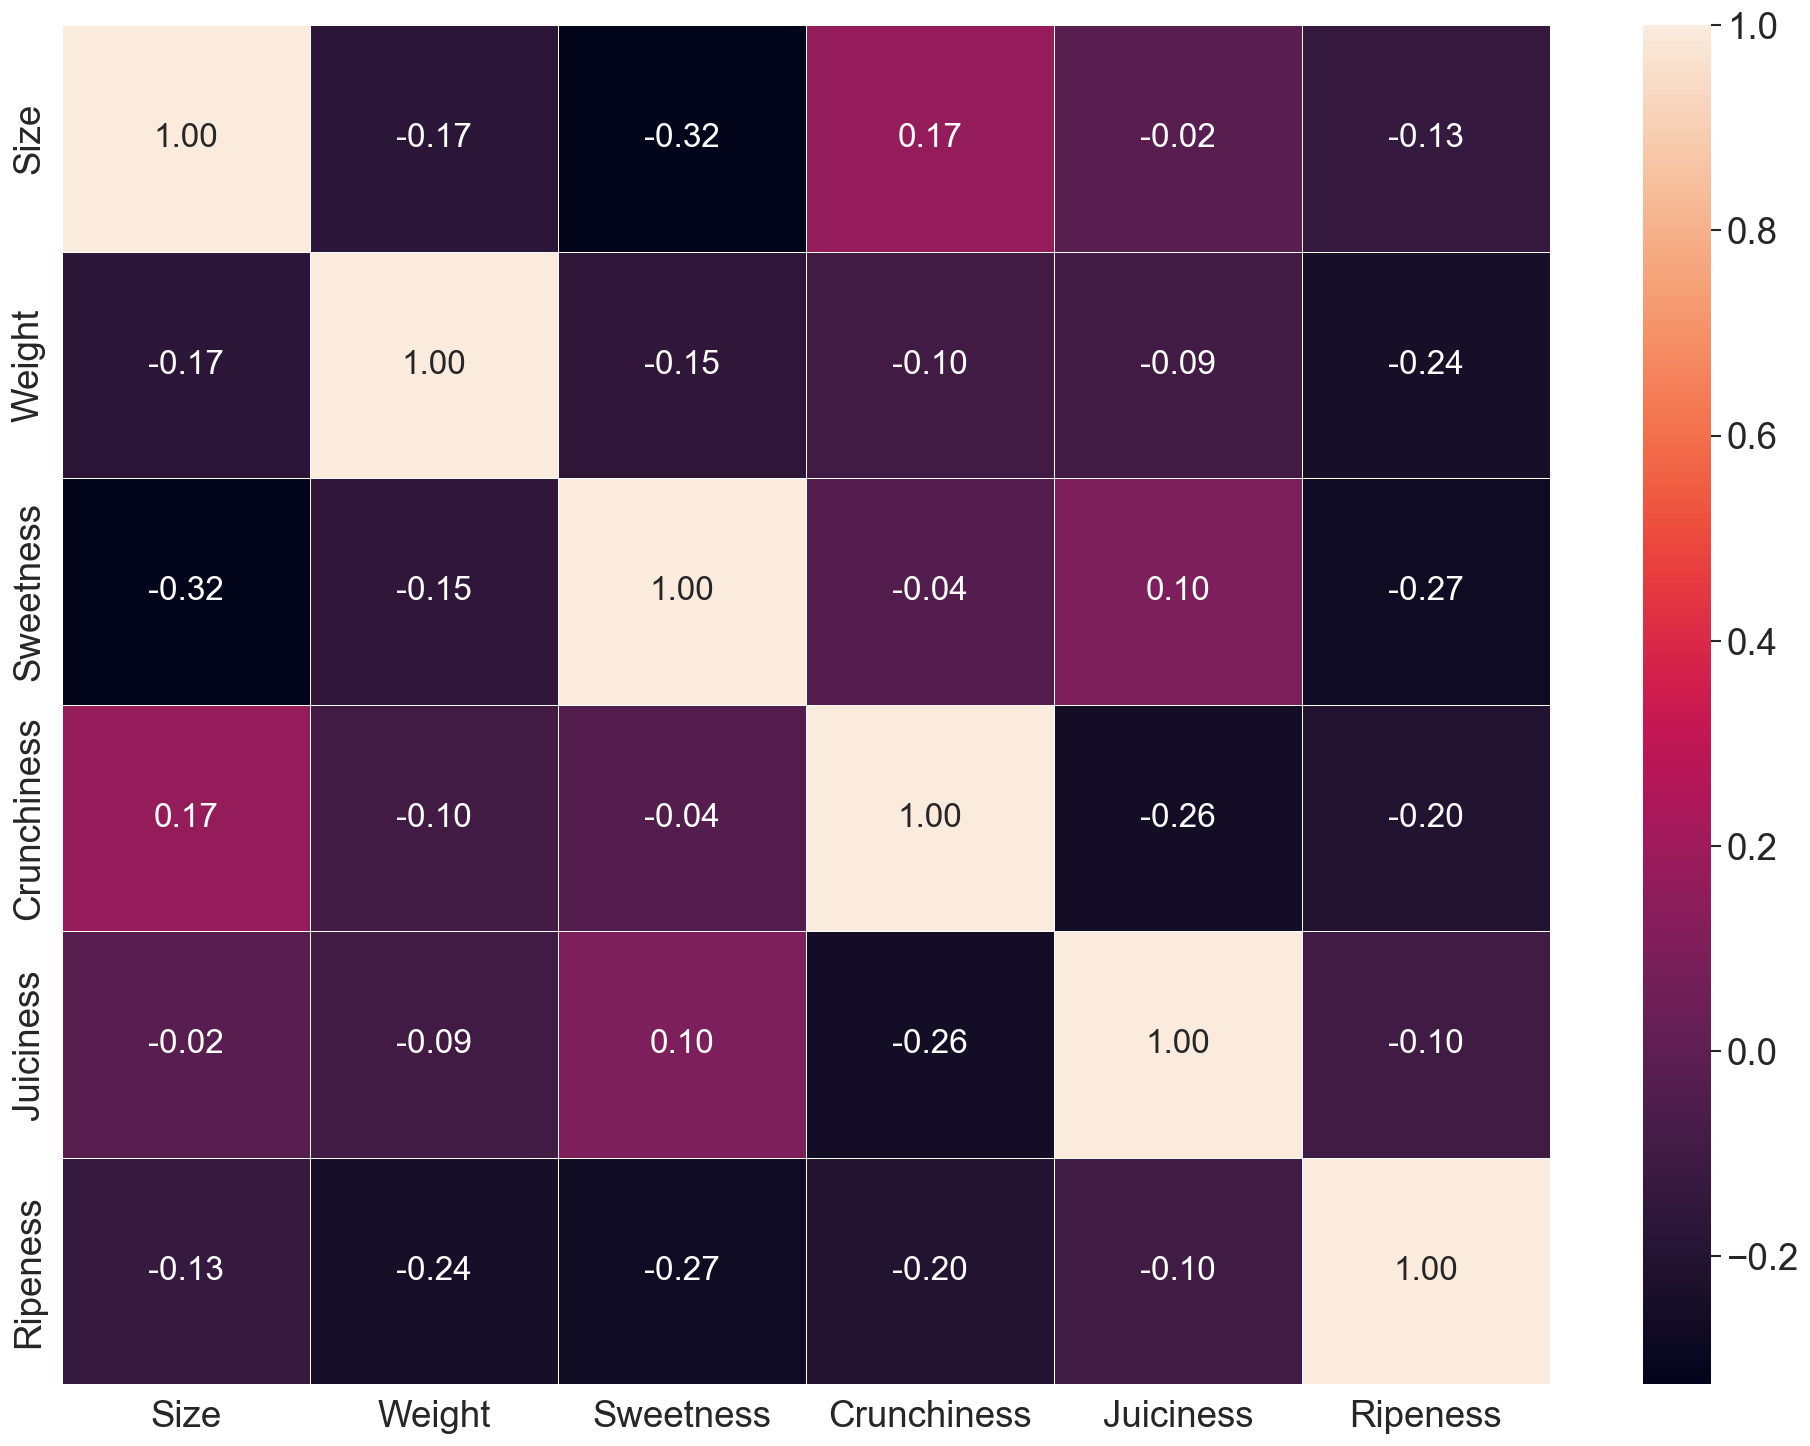

In [74]:
corr_matrix = raw_data.drop(['Quality'], axis=1).corr()
fig, ax = plt.subplots(figsize=(20, 15), dpi=120)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f', 
                 annot_kws={"size": 20})
sns.set(font_scale=2)

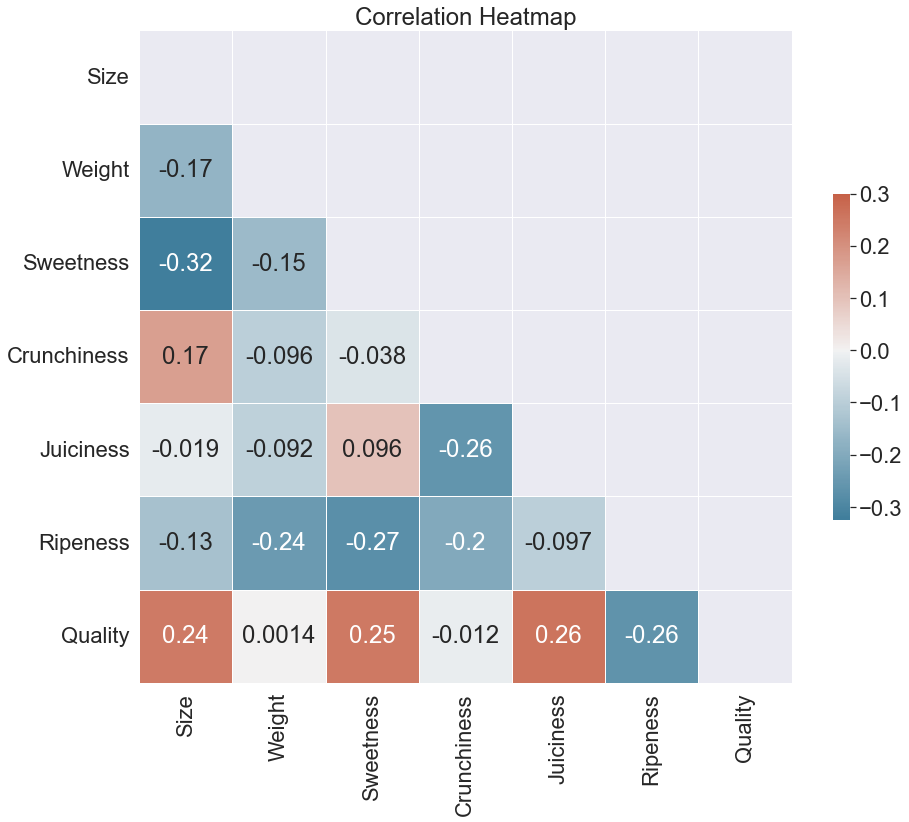

In [75]:
corr = raw_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

In [76]:
X = raw_data.drop('Quality', axis=1)

In [77]:
y = raw_data[['Quality']]

In [78]:
# X_train = X[:int(len(X)*0.80)]
# X_test = X[int(len(X)*0.80):]
# y_train = y[:int(len(y)*0.80)]
# y_test = y[int(len(y)*0.80):]

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)

In [84]:
X.describe().T.style.background_gradient(axis=0, cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Size,4008.000000,0.490255,0.142241,0.000000,0.393172,0.489598,0.586900,1.000000
Weight,4008.000000,0.476024,0.123762,0.000000,0.397052,0.476418,0.554808,1.000000
Sweetness,4008.000000,0.484133,0.146384,0.000000,0.388568,0.481538,0.579613,1.000000
Crunchiness,4008.000000,0.514917,0.102531,0.000000,0.447492,0.516034,0.581305,1.000000
Juiciness,4008.000000,0.485754,0.144813,0.000000,0.387234,0.487466,0.585059,1.000000
Ripeness,4008.000000,0.485691,0.143054,0.000000,0.388700,0.486088,0.582724,1.000000
Acidity,4008.000000,0.491702,0.146467,0.000000,0.390722,0.487914,0.591199,1.000000


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = False)
sc = StandardScaler()
ns = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
# '''
# As a rule of thumb, an AUC can be classed as follows,

# 0.90 - 1.00 = excellent
# 0.80 - 0.90 = good
# 0.70 - 0.80 = fair
# 0.60 - 0.70 = poor
# 0.50 - 0.60 = fail

# '''

[[281 119]
 [ 96 306]]
Accuracy:  73.19201995012469


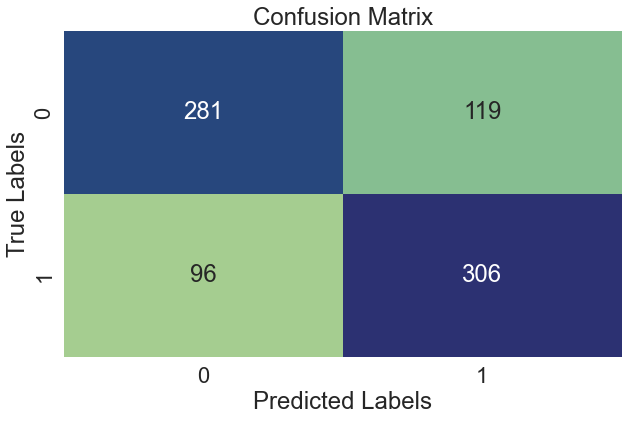

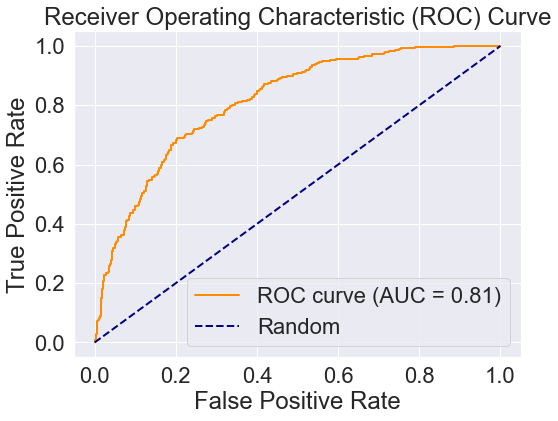

In [119]:
# LOGISTIC REGRESSION
lr = LogisticRegression(random_state=0, solver = 'lbfgs', n_jobs=-1, max_iter=1_000, C=1).fit(X_train, y_train.squeeze())
y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[322  78]
 [ 63 339]]
Accuracy:  82.41895261845387


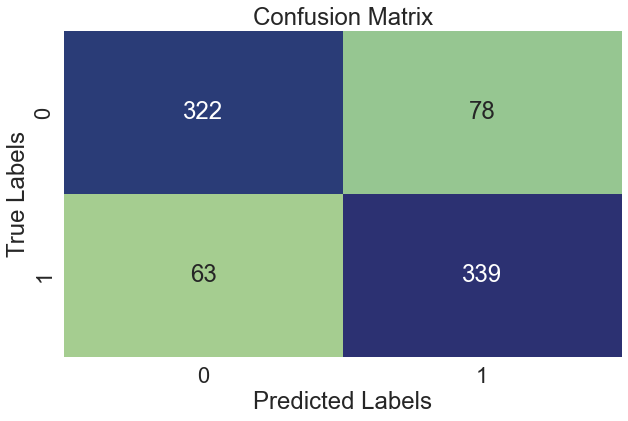

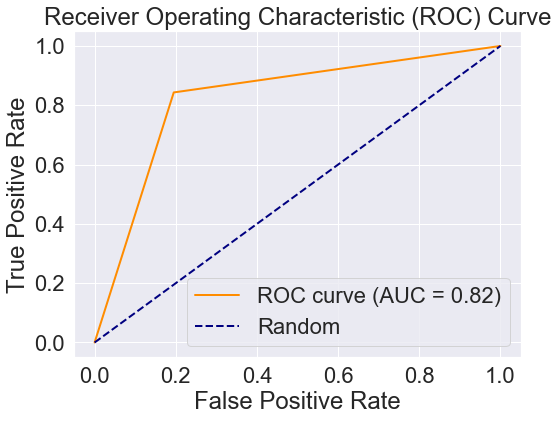

In [103]:
# DECISION TREE
dtc = tree.DecisionTreeClassifier(max_depth=20)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
# tree.plot_tree(dtc)

[[276 124]
 [ 86 316]]
Accuracy:  73.81546134663341


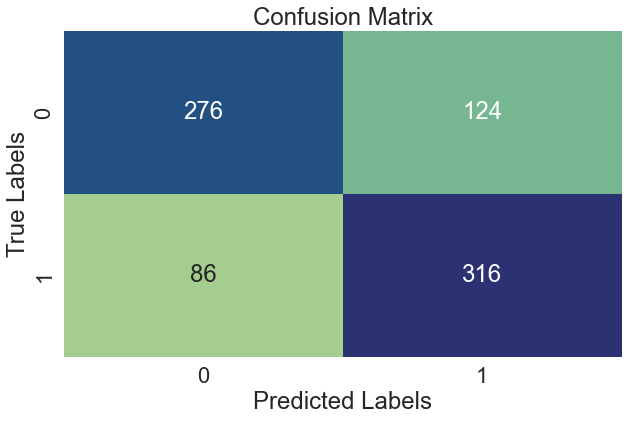

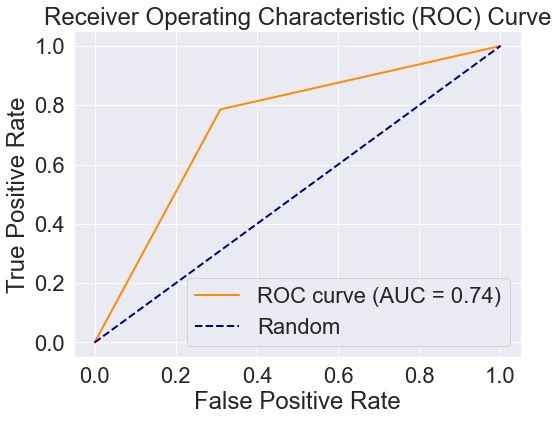

In [104]:
# SVC
svc = SVC(gamma='auto', kernel='linear')
svc.fit(X_train, y_train.squeeze())
y_pred = svc.predict(X_test)
score = svc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[360  40]
 [ 32 370]]
Accuracy:  91.02244389027432


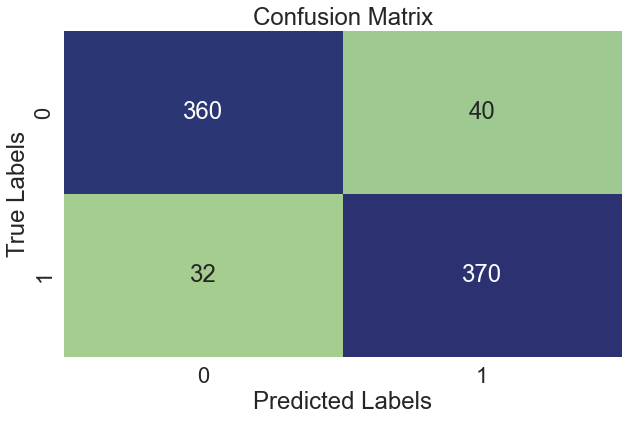

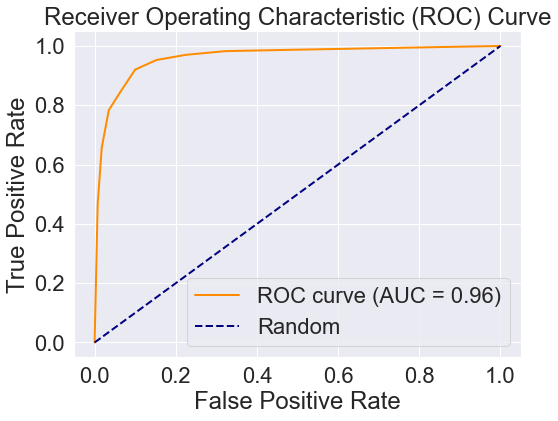

In [120]:
# KNC
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(X_train, y_train.squeeze())
y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, knc.predict_proba(X_test)[:, 1])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
# GNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.squeeze())
y_pred = gnb.predict(X_test)
score = gnb.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

[[299 101]
 [ 97 305]]
Accuracy:  75.31172069825436


[[353  47]
 [ 41 361]]
Accuracy:  89.02743142144638


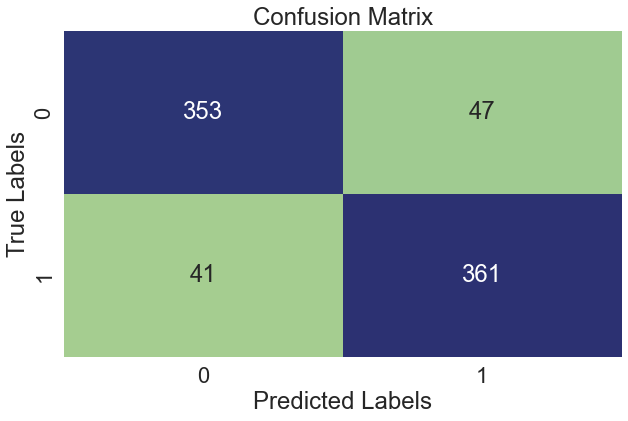

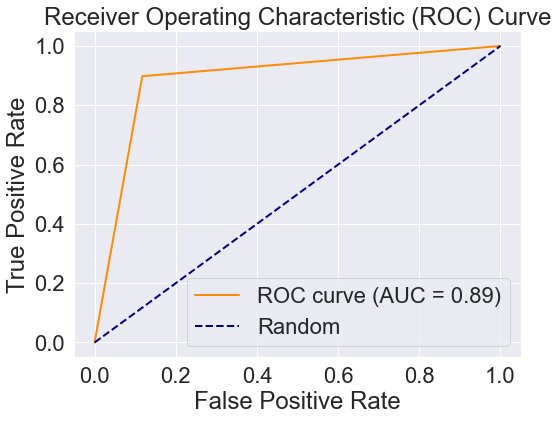

In [106]:
# Random Forest
rfc = RandomForestClassifier(max_depth=20, random_state=0)
rfc.fit(X_train, y_train.squeeze())
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [91]:
# GRADIENT BOOSTING
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train.squeeze())
y_pred = gbc.predict(X_test)
score = gbc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

[[304  96]
 [ 86 316]]
Accuracy:  77.3067331670823


In [92]:
# ADA BOOST CLASIFIER
abc = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
abc.fit(X_train, y_train.squeeze())
y_pred = abc.predict(X_test)
score = abc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

[[286 114]
 [ 86 316]]
Accuracy:  75.06234413965088


In [93]:
# STOCHASTIC GRADIENT CLASSIFIER
sgc = SGDClassifier(loss="hinge", max_iter=100)
sgc.fit(X_train, y_train.squeeze())
y_pred = sgc.predict(X_test)
score = sgc.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

[[235 165]
 [ 55 347]]
Accuracy:  72.56857855361596


In [94]:
# MLP
mlp = MLPClassifier(random_state=0, max_iter=1_000, hidden_layer_sizes=(300,))
mlp.fit(X_train, y_train.squeeze())
y_pred = mlp.predict(X_test)
score = mlp.score(X_test, y_test.squeeze())
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', score*100)

[[340  60]
 [ 45 357]]
Accuracy:  86.9077306733167


In [33]:
# MLP GRID SEARCH
parameters = {
#     'max_iter':[500, 1_000, 5_000, 10_000, 50_000], 
    'max_iter':[1_000], 
#     'hidden_layer_sizes': [(50,), (100,), (300,), (500,), (1_000,), (5_000,)],
    'hidden_layer_sizes': [(50,), (100,), (300,), (500,), (1000,)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}
gs = GridSearchCV(MLPClassifier(random_state=0, max_iter=1_000,), parameters, n_jobs=-1, scoring='accuracy', verbose=2)
gs.fit(X_train, y_train.squeeze())
print(sorted(gs.cv_results_.keys()))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_activation', 'param_hidden_layer_sizes', 'param_max_iter', 'param_solver', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [34]:
gs.best_estimator_

MLPClassifier(hidden_layer_sizes=(300,), max_iter=1000, random_state=0)

In [35]:
# MLP RANDOMIZED SEARCH

parameters = {
#     'max_iter':[500, 1_000, 5_000, 10_000, 50_000], 
    'max_iter':[1_000], 
#     'hidden_layer_sizes': [(50,), (100,), (300,), (500,), (1_000,), (5_000,)],
    'hidden_layer_sizes': [(50,), (100,), (300,), (500,), (1000,)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

randomized_search = RandomizedSearchCV(
    MLPClassifier(random_state=0, max_iter=1_000,),
    param_distributions=parameters,
    n_iter=1000,
    cv=5,
    scoring='accuracy',
    random_state=0,
    n_jobs=-1,
    verbose=2,
)

randomized_search.fit(X_train, y_train.squeeze())

best_params = randomized_search.best_params_
print(f"Best Hyperparameters for MLPClassifier: {best_params}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters for MLPClassifier: {'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (300,), 'activation': 'relu'}


In [36]:
gs.best_score_

0.9365625

In [37]:
# ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=X_train.shape[1], activation='tanh'))
ann.add(tf.keras.layers.Dense(units=1000,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=500,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=200,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=10,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')
history = ann.fit(X_train, y_train, batch_size = 1, epochs = 200, verbose=2, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test)
ann.summary()

Epoch 1/200
3200/3200 - 5s - loss: 0.6386 - accuracy: 0.6584 - val_loss: 0.5903 - val_accuracy: 0.6913 - 5s/epoch - 2ms/step
Epoch 2/200
3200/3200 - 4s - loss: 0.6071 - accuracy: 0.6909 - val_loss: 0.5852 - val_accuracy: 0.7000 - 4s/epoch - 1ms/step
Epoch 3/200
3200/3200 - 4s - loss: 0.5837 - accuracy: 0.7041 - val_loss: 0.5772 - val_accuracy: 0.6800 - 4s/epoch - 1ms/step
Epoch 4/200
3200/3200 - 4s - loss: 0.6161 - accuracy: 0.6434 - val_loss: 0.6320 - val_accuracy: 0.6513 - 4s/epoch - 1ms/step
Epoch 5/200
3200/3200 - 4s - loss: 0.5771 - accuracy: 0.7003 - val_loss: 0.5550 - val_accuracy: 0.7237 - 4s/epoch - 1ms/step
Epoch 6/200
3200/3200 - 4s - loss: 0.5295 - accuracy: 0.7359 - val_loss: 0.5291 - val_accuracy: 0.7175 - 4s/epoch - 1ms/step
Epoch 7/200
3200/3200 - 4s - loss: 0.5301 - accuracy: 0.7291 - val_loss: 0.5719 - val_accuracy: 0.7125 - 4s/epoch - 1ms/step
Epoch 8/200
3200/3200 - 4s - loss: 0.5410 - accuracy: 0.7300 - val_loss: 0.5194 - val_accuracy: 0.7412 - 4s/epoch - 1ms/step


In [38]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

25/25 [==============================] - 0s 1ms/step
[[363  33]
 [ 58 346]]
Accuracy:  88.625


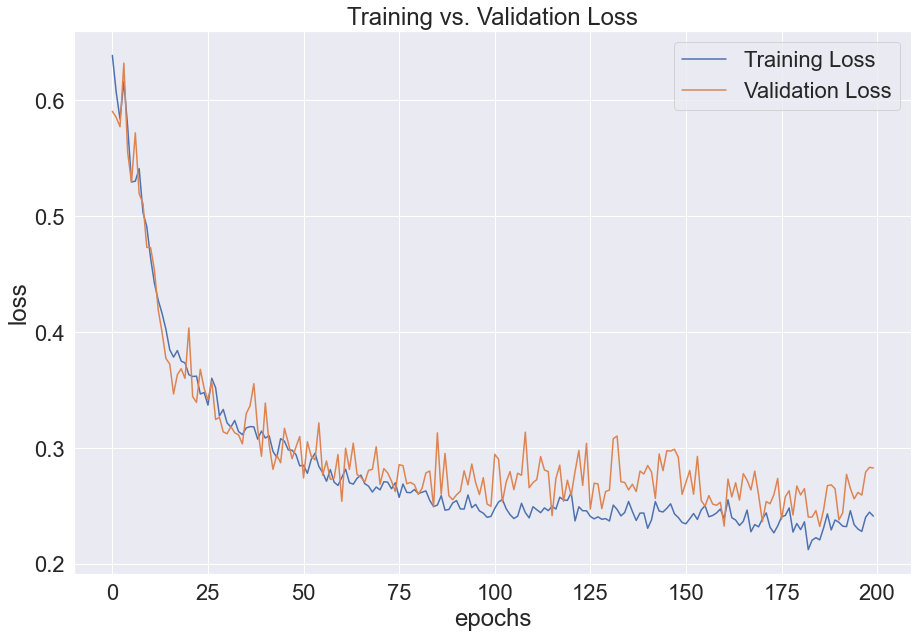

In [39]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max accuracy:  90.75000286102295


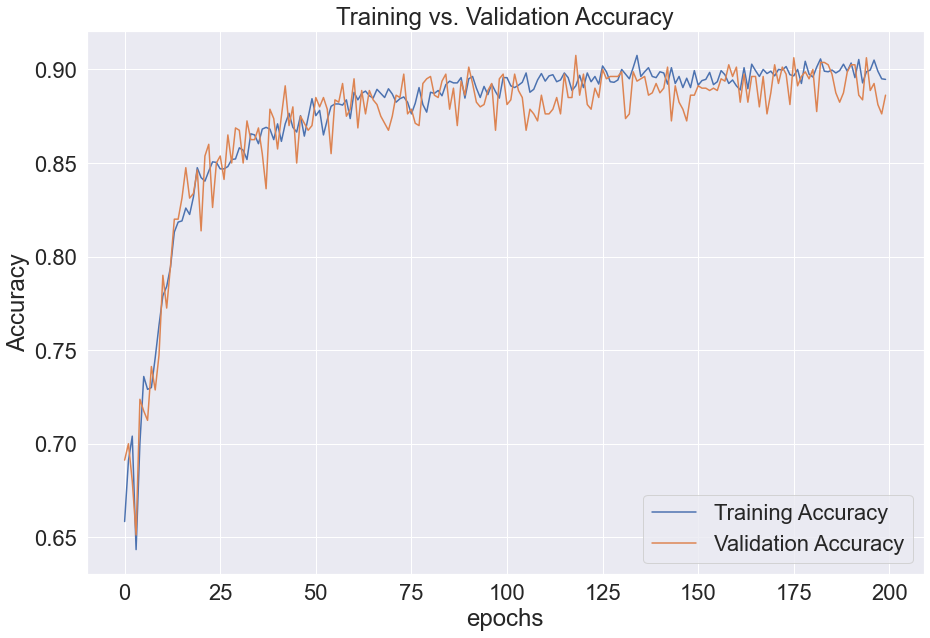

In [40]:
print('Max accuracy: ', max(history.history['val_accuracy']) * 100)
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# LSTM
lstm = Sequential()
lstm.add(LSTM(units=X_train.shape[1], return_sequences = True, bias_initializer="zeros",input_shape = (X_train.shape[1], 1)))
lstm.add(Dropout(0.1))
lstm.add(LSTM(units = 300, return_sequences = True))
lstm.add(Dropout(0.25))
lstm.add(LSTM(units = 200, return_sequences = True))
lstm.add(Dropout(0.5))
lstm.add(LSTM(units = 100, return_sequences = True))
lstm.add(LSTM(units = 10))
lstm.add(Dense(units=pd.DataFrame(y_train).shape[1], activation='sigmoid'),)
lstm.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')
history = lstm.fit(X_train, y_train, batch_size = 1, epochs = 200, verbose=1, validation_data=(X_test,y_test))
lstm.summary()

Epoch 1/200
3200/3200 [==============================] - 30s 8ms/step - loss: 0.6955 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.6876 - accuracy: 0.5322 - val_loss: 0.6765 - val_accuracy: 0.5975
Epoch 3/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.6759 - accuracy: 0.5863 - val_loss: 0.6747 - val_accuracy: 0.5938
Epoch 4/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.6602 - accuracy: 0.6153 - val_loss: 0.6150 - val_accuracy: 0.6538
Epoch 5/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.6193 - accuracy: 0.6509 - val_loss: 0.5814 - val_accuracy: 0.6825
Epoch 6/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.5802 - accuracy: 0.6931 - val_loss: 0.5735 - val_accuracy: 0.7250
Epoch 7/200
3200/3200 [==============================] - 25s 8ms/step - loss: 0.5640 - accuracy: 0.7122 - val_loss: 0.5747 -

In [42]:
y_pred = lstm.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

25/25 [==============================] - 2s 25ms/step
[[348  48]
 [ 43 361]]
Accuracy:  88.625


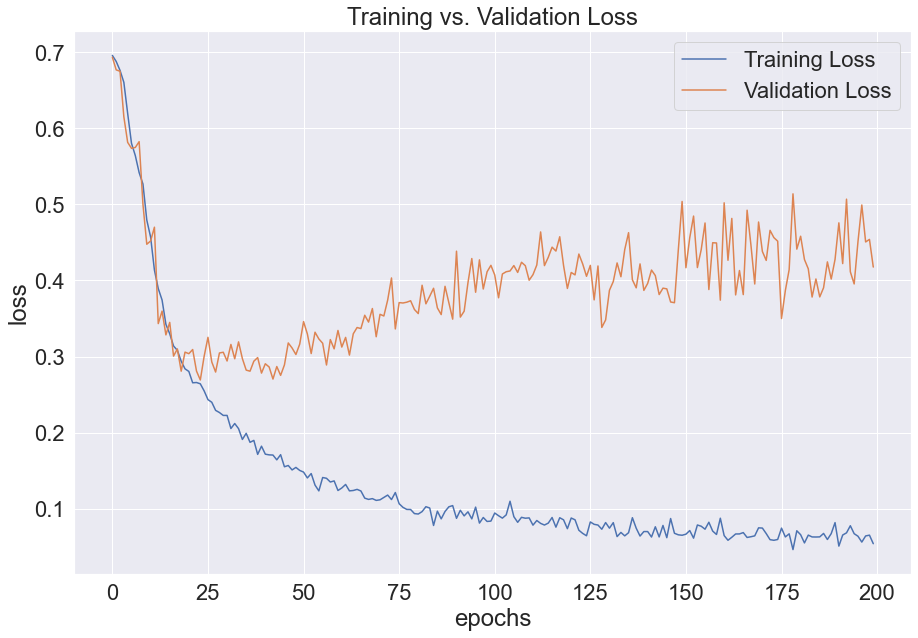

In [43]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max accuracy:  91.00000262260437


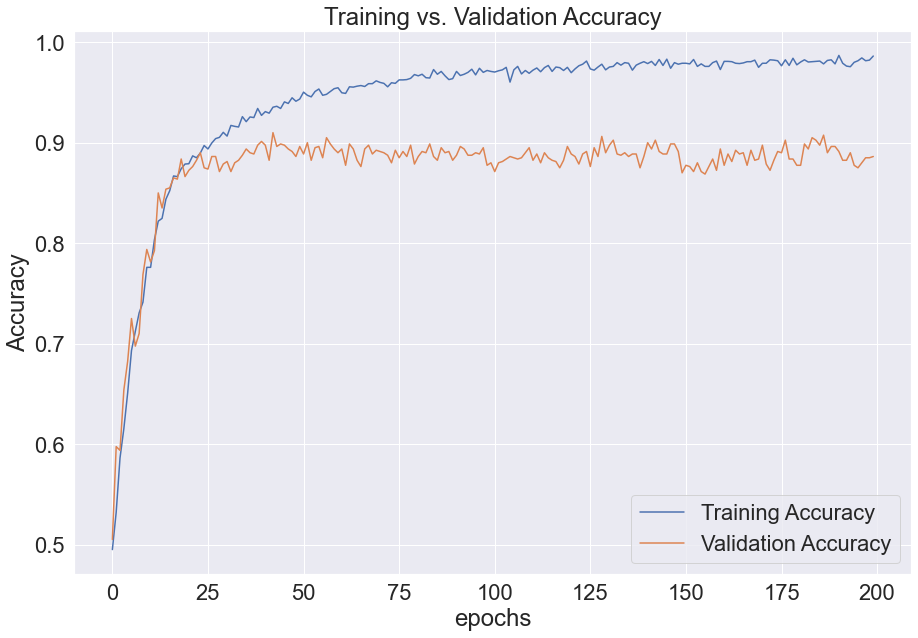

In [44]:
print('Max accuracy: ', max(history.history['val_accuracy']) * 100)
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# VOTING CLASSIFIER
clf1 = lr
clf2 = dtc
clf3 = svc
clf4 = knc
clf5 = gnb
clf6 = rfc
clf7 = gbc
clf8 = abc
clf9 = mlp
clf10 = ann
clf11 = lstm


eclf = VotingClassifier(
    estimators=[('lr', clf1), ('dtc', clf2), ('svc', clf3), ('knc', clf4), ('gnb', clf5), ('rfc', clf6), ('gbc', clf7),
                ('abc', clf8), ('mlp', clf9)],
    voting='hard')

eclf.fit(X_train, y_train.squeeze())
y_pred = eclf.predict(X_test)
# print(pred)
# pred = (pred > 0.5)
score = accuracy_score(y_test, y_pred)*100
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)
# for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, eclf], 
#                       ['LR', 'DTC', 'SVC', 'KNC', 'GNB', 'RFC', 'GBC', 'ABC', 'MLP', 'ANN', 'LSTM']):
# #     scores = cross_val_score(clf, X_test, y_test.squeeze(), scoring='accuracy', cv=5)
#     pred = clf.predict(X_test)
#     pred = (pred > 0.5)
#     score = accuracy_score(y_test, y_pred)*100
#     print("Accuracy: %0.2f [%s]" % (score, label))

[[348  48]
 [ 35 369]]
Accuracy:  89.625


In [95]:
# LAZY PREDICT
lzc = LazyClassifier(custom_metric=None)
models, predictions = lzc.fit(X_train, X_test, y_train.squeeze(), y_test.squeeze())
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.21it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.91,0.91,0.91,0.07
LabelSpreading,0.90,0.90,0.90,0.90,0.29
KNeighborsClassifier,0.90,0.90,0.90,0.90,0.03
LabelPropagation,0.90,0.90,0.90,0.90,0.21
SVC,0.90,0.90,0.90,0.90,0.23
ExtraTreesClassifier,0.89,0.89,0.89,0.89,0.32
XGBClassifier,0.89,0.89,0.89,0.89,0.14
RandomForestClassifier,0.89,0.89,0.89,0.89,0.49
NuSVC,0.88,0.88,0.88,0.88,0.35


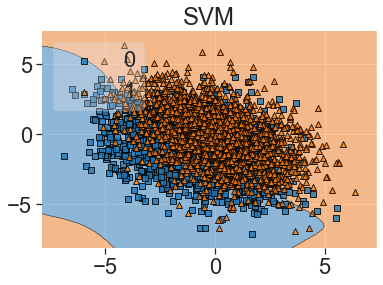

In [47]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X_plot = raw_data[['Sweetness', 'Size']].to_numpy()
y_plot = y.to_numpy().squeeze()
# Training a classifier
svm = SVC(C=0.5, kernel='rbf')
svm.fit(X_plot, y_plot)


# Plotting decision regions
plot_decision_regions(X_plot, y_plot, clf=svm, legend=2)

# Adding axes annotations
plt.title('SVM')
plt.show()

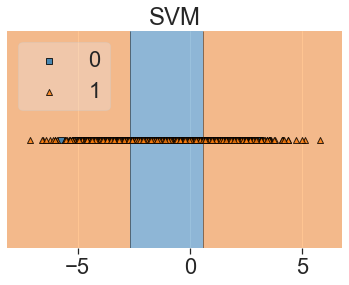

In [48]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X_plot = raw_data[['Weight']].to_numpy()
y_plot = y.to_numpy().squeeze()
# Training a classifier
svm = SVC(C=0.5, kernel='rbf')
svm.fit(X_plot, y_plot)

# Plotting decision regions
plot_decision_regions(X_plot, y_plot, clf=svm, legend=2)

# Adding axes annotations
plt.title('SVM')

plt.show()

In [52]:
# SELF TRAINING MODEL
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
rng = np.random.RandomState(42)
iris = datasets.load_iris()
random_unlabeled_points = rng.rand(iris.target.shape[0]) < 0.3
iris.target[random_unlabeled_points] = -1

svc = SVC(probability=True, gamma="auto")
svc.fit(iris.data, iris.target)
# y_pred = svc.predict(iris.data)
# score = accuracy_score(y_test, y_pred)*100
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(iris.data, iris.target)

# y_pred = self_training_model.predict(iris.data)
# score = accuracy_score(y_test, y_pred)*100
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))